In [2]:
# https://jupyterbook.org/en/stable/start/your-first-book.html
from typing import List, Tuple


# Grafos

* Un **grafo no dirigido** es un par $G = (V, E)$ donde $V$ es un conjunto de nodos no vacío y $E \subseteq \{ (u, v) : u,v \in V \}$ es un conjunto de
aristas que unen pares de vértices.

* Un **grafo dirigido** es un par $G = (V, E)$ donde $V$ es un conjunto de nodos no vacío y $E \subseteq \{ (u, v) : u,v \in V \}$ es un conjunto de
aristas **ordenadas** que unen  pares de vértices.



## Implementación de grafos

La **estructura de datos** (EdD) más sencilla para un grafo es la formada por una **lista de nodos y una lista de aristas**. 
Por ejemplo $G = (V, E)$ tal que $V$ podría ser la lista de nodos $V = [1,2,3]$ y $E$ la lista de aristas $E= [(1,2), (1,3), (2,3)]$.  

Sin embargo esta representación **no es apropiada** para responder *eficientemente* a algunas preguntas *habituales en los algoritmos* diseñados para procesar grafos, por ejemplo: ¿Cuáles son los vecinos de un nodo $u$? o ¿Están unidos por una arista los nodos $u$ y $v$?. Si el grafo se implementase con listas, para responder a estas preguntas, se tendría que recorrer **toda** la lista de aristas del grafo (búsqueda lineal) siendo su coste $O(|V| \cdot |E|)$ donde $|V|$ indica el número total de nodos y $|E|$ el de aristas.

Existen dos estructuras de datos estándar para grafos que permiten responder al menos a una de las dos preguntas anteriores eficientemente: La **matriz de adyacencia** y la **lista de adyacencia**.

* **Lista de adyacencia**
En una lista de adyacencia de un grafo $G = (V, E)$, para todo nodo $u \in V$, todos sus vecinos se almacenan en una lista desordenada.

* En la **matriz de adyacencia** del grafo $G = (V, E)$, sus aristas se almacenan en un array de dimensión $|V| \times  |V|$ tal que la $i$-ésima fila
de la tabla corresponde a los vecinos del nodo $i$. El valor `True` (o 1) en la columna $j$ indica que la arista $(i, j) \in E$ mientras que el valor
 `False` (o 0) indicaría la ausencia de dicha arista, $(i, j) \notin E$

**Ejemplo:**

* En la figura siguiente se se utiliza una lista de adyacencia y una matriz de adyacencia como EdD para almacenar  un **grafo no dirigido**. Notad como para grafos no dirigidos la matriz de adyacencia es simétrica 
<img src="graph_Fig-22-1-representations-undirected.jpg">

* Lista de adyacencia y matriz de adyacencia de un **grafo dirigido:** 

<img src="graph_Fig-22-2-representations-directed.jpg">



**Ventajas/inconvenientes entre listas de adyacencia y matriz de adyacencia**

¿Cuál de las dos estructuras de datos para implementar los grafos es mas conveniente? 
Para ello debemos evaluar cual de las dos estructuras de datos permite responder a las preguntas siguientes con el menor coste: 
1. ¿Es $v$ un vecino de $u$? 
1. ¿Cuáles son los vecinos de $u$?.


* La **listas de adyacencia** permiten responder a la **segunda pregunta:** eficientemente. Por definición la lista de adyacencia de un nodo $u \in V$ está formada por sus vecinos. Por tanto, para obtener los nodos vecinos de $u$ simplemente habría que iterar su lista de adyacencia.
Sin embargo, para responder a la **primera pregunta** es necesario buscar en esa misma lista desordenada si el nodo $v$ se encuentra en ella. 
Por tanto, para evaluar el coste de responder a ambas preguntas, primero tendríamos que acceder, en tiempo constante $O(1)$, a la lista de adyacencia del nodo $u$, y luego iterar una lista de longitud u.*degree*. En consecuencia el coste de realizar estas operaciones para todos los nodos del grafo es lineal $O(|E|)$.


* La **matriz de adyacencia** es eficiente para responder a la **primera pregunta**: tan solo hay que observar el valor la casilla apropiada de la matriz de adyacencia. Si la entrada $(u, v)$ de la matriz tiene el valor `True`, entonces existe la arista $(u, v)$. 
Recuerda que acceder a una posición de un array requiere tiempo constante $O(1)$. 
Sin embargo, responder a la **segunda pregunta** requiere recorrer la fila completa de la tabla, entrada por entrada. Como hay $|V|$ entradas en una fila, este bucle requiere un tiempo cuadrático $O(|V|^2)$ cuando la operación se realiza para todos los nodos del grafo.


Resumiendo, las matrices de adyacencia resuelven la primera pregunta con menor coste, en tiempo O(1), mientras que las listas de adyacencia son más rápidas para resolver la segunda pregunta, $|E| \leqslant |V|^2$ y, habitualmente los grafos son poco densos siendo $|E| \ll |V|^2$.

 Respecto al **coste en memoria**, la matriz de adyacencia es $\Theta(|V|^2)$ independientemente de las aristas que tenga el grafo. Por tanto, dese el punto de vista de coste en memoria, esta estrategia es intuitivamente muy ineficiente: *es justificable que las estructuras de datos demanden espacio para los datos que realmente están, no para datos que no están presentes*.


<div class="alert-warning">

**_Cuestiones_**

* **(F)** Hemos visto que cuando se utiliza una matriz de adyacencia $A$ como estructura de datos para almacenar un grafo $G$, las aristas que parten del i-ésimo nodo se representan por la i-ésima **fila** de la matriz. Conocida la matriz $A$ de un grafo ¿Cómo se pueden obtener las aristas que *inciden* en el i-ésimo nodo del grafo? ¿Cómo podríamos obtener a partir de $A$ una nueva matriz $M$ tal que su elemento $(i,j)$ nos informase si una arista proveniente del nodo $j$  *incide* sobre el nodo $i$?. ¿Que relación tiene $M$ con el grafo traspuesto de $G$ (el grafo transpuesto de $G$ que denominaremos $G^T$ es aquel que se obtiene  invirtiendo el sentido de todas las aristas de $G$)?. 

     **Solución:**
> * Notad que la í-ésima **columna** de la matriz de adyacencia $A$ representa las aristas que inciden en el nodo $i$. Por tanto, si se desease tener una matriz $M$ en las que sus filas representasen las aristas que inciden en los nodos, esta se podría obtener hallando la traspuesta de la matriz de adyacencia $M = A^T$.    
>
> * $M$ es la matriz de adyacencia del grafo transpuesto $G^T$.


* **(F)** Suponga que $A$ es la matriz de adyacencia de un grafo $G$. ¿Qué significado tienen las celdas de la matriz $A^2$? Verifique su significado con la matriz de adyacencia  
$ A = 
\begin{pmatrix}
0 & 1 & 1\\
0 & 0 & 1 \\
1 & 0 & 0 
\end{pmatrix}
$

    **Solución:**
> El elemento $(i,j)$ de la matriz $A^2$, indica cuantos caminos de longitud 2 existen entre los vértices $i$ y $j$ del grafo.
>
> Por tanto, si queremos calcular el número de caminos de longitud $l$ que hay entre dos vértices
$v_i$ y $v_j$, basta con calcular la potencia correspondiente $M=A^l$ de la matriz de y consultar el elemento de la matriz $m^l(i,j)$ correspondiente.

## Relaciones entre Grafos:  Isomorfismos y subgrafos


Dos grafos $G=(V, E)$ y $G'=(V', E')$ son isomorfos si existe una transformación biyectiva entre los nodos de ambos grafos  $\phi: \; V \to V' $ de manera que para toda arista del grafo $G$, $(u,v) \in E$, entonces $ (\phi(u), \phi(v)) \in E'$

**Ejemplo:**

Los grafos de la siguiente figura son isomorfos

<img src="grafo_isomorfo_1.jpg">

<div class="alert-warning">

**_Cuestiones_**

* **(F)** ¿Cuales de los siguientes grafos son isomorfos?

<img src="grafo_isomorfo_2.jpg">

## Recorridos (*traverse*) en grafos

* **Importante:** Los algoritmos de recorridos en anchura y en profundidad los has programado en clase de prácticas, repásalos!!

**Ejemplo de procesamiento de un grafo con el algoritmo DFS**

>  Puedes encontrar una descripción detallada de la evolución paso a paso del algoritmo del ejemplo 1 en el Cormen et al. 4 Edition, Chapter 20. 
>
> <img src="graph_dfs_cormen4.jpg">

<div class="alert-warning">

**_Cuestiones_**

* **(F)** Proporciona un algoritmo para detectar la presencia de un ciclo en un grafo dirigido. ¿Cúal es su coste?¿Y si el grafo es no dirigido?.
>**Solución:**
>
> Habrá un ciclo en un grafo $G$, independientemente de que el grafo sea dirigido o no-dirigido, cuando en el transcurso de la aplicación de dfs_visit() se alcance un nodo en estado GRAY. En el cuerpo del bucle `for` del procedimiento `dfs_visit()` considerar esa posibilidad incluyendo la sentencia else if (elif) apropiada.

* **(F+)** Cuando se aplica el algoritmo DFS sobre un grafo dirigido se obtiene un bosque DFS. ¿Que podemos decir de un nodo $y$ que pertenezca a un árbol DFS cuya raíz sea $r$ ?
> **Solución:**
>
> Si un nodo $y$ pertenece a un árbol DFS cuya raíz es $r$, entonces en el momento de empezar a procesarse $r$, esto es, cuando *se descubre* $r$, **necesariamente existe un camino de $r$ a $y$ formado por nodos en estado blanco (es decir, $y$ es accesible desde $r$ por un camino de nodos sin descubrir)**. O lo que es lo mismo, todos los nodos que pertenecen al árbol de raíz $r$ son *accesibles* desde $r$  por caminos de nodos que estaban sin descubrir en el *momento en que se descubrió* $r$ (verifícalo en la figura anterior). 


* **(F+)** Suponga que $I_y = [D_y, F_y]$ y $I_x = [D_x, F_x]$ son los intervalos formados por el tiempo de descubrimiento y finalización de los nodos $y$ y $x$ respectivamente. Discuta *la relación* que tienen los nodos $x$ e $y$ en un bosque DFS cuando:
 * Los intervalos de tiempo $I_x$ e $I_y$ sean disjuntos.
 * Los intervalos de tiempo  $I_x$ e $I_y$ estén anidados. Por ejemplo 
 $[ D_y, [D_x, F_x], F_y]$

* **(F+)** Suponga que $D_y, F_y$ son los tiempos de descubrimiento y finalización del nodo $y$ de un Grafo cuando se procesa con DFS y $D_x, F_x$ los correspondientes al nodo $x$. ¿Es posible que $D_x < D_y < F_x < F_y$? Justifique la respuesta.

* **(F)** Suponga que se tras aplicar el algoritmo DFS a un Grafo $G$ dirigido cuyos nodos son V={0,1,2,3,4,5,6,7} se obtiene el siguiente bosque DFS con los siguientes tiempos de descubrimiento $D=[1,2,8,3,5,11,12,14 ]$ y finalización 
$F=[10,7,9,4,6,16,13,15]$
<pre>
          0 (1/10)                5 (11/16)
         /   \                   /  \
 (2/7) 1      2 (8/9)  (12/13) 6     7 (14/15)
       /  \
(3/4) 3    4 (5/6)
</pre>
  Indique cual de las siguientes afirmaciones es Verdadera o Falsa y porqué (siempre referidas al grafo $G$):
  * Sabemos con certeza que **no** puede haber una arista desde el nodo 1 al 2.
  * Sabemos con certeza que **no** puede haber arista desde el nodo 2 al 1.
  * Sabemos con certeza que existe una arista desde el nodo 1 al 2.
  * Sabemos con certeza que **no** puede existir un ciclo formado por los nodos 0, 1, y 2.
  * Sabemos con certeza que **no** puede haber una arista desde cualquier nodo perteneciente al primer árbol a un nodo del segundo.
  * Sabemos con certeza que **no** puede haber una arista desde cualquier nodo del segundo árbol a uno del primero.
  * Sabemos con certeza que no puede haber un **camino** desde el nodo 1 a un nodo cualquiera del segundo árbol.
  * Sabemos con certeza que no puede haber un camino desde el nodo 5 a un nodo cualquiera del primer árbol.
* **(F)** Suponga un grafo dirigido de nodos V={0,1,2,3,4,5,6,7}. Dibuje un bosque DFS que sea compatible
con los siguientes tiempos de descubrimiento y finalización
$D=[1,7,11,2,4,8,12,13]$ y $F=[6,10,16,3,5,9,15,14]$

## Cnectividad y detección de componentes fuertemente conexas

* **Importante:** (Repasa el código de Tarjan y las cuestiones de la Práctica del Laboratorio).

Sea un grafo $G=(V, E)$,

* Un grafo $G$ **no dirigido** es **conexo** si para todo par de  nodos $u, v \in V$ existe un camino de $u \rightsquigarrow v$

* Un grafo $G$ **dirigido** es **fuertemente conexo** si para todo par de nodos $u, v \in V$ existen un camino $u \rightsquigarrow v$  y otro $ v \rightsquigarrow u$ 

### Grafos no dirigidos

**Pseudo-código**

1. Ejecutar `dfs(G)`

1. Los vértices de cada uno de los árboles de DFS constituyen una componente conexa. 


* Notad que el grafo es conexo si y solo si el bosque DFS es un _árbol abarcador_.

### Grafos dirigidos . Algoritmo de Tarjan para encontrar las componente fuertemente conexas.

**Pseudo-código**

1. Ejecutar `dfs(G)` para obtener los tiempos de finalización para cada uno de los vértices del grafo.

1.  Computar el grafo traspuesto $G^T$

1.  Ejecutar dfs($G^T$) pero en el bucle principal del driver considerar los vértices en orden decreciente a su tiempo de finalización $F_u$

1. Los vértices de cada uno de los árboles de DFS formados en el paso 3, constituyen una componente fuertemente conexa. 

<div class="alert-warning">

**_Cuestiones_**

 * **(F)** Suponga el grafo siguiente matriz de adyacencia 
 $$ A = 
\begin{pmatrix}
0 & 1 & 1 & 0\\
0 & 0 & 1 & 0\\
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 
\end{pmatrix}
$$
 Aplique el algoritmo de Tarjan indicando los árboles DFS con los tiempos de descubrimiento y finalización, tras las sucesivas *ejecuciones* de los algoritmos DFS.  


<div class="alert-warning">


**_Cuestiones_**


* **(F)** Justifica el siguiente Lema: 
_Un grafo $G$ y su transpuesto $G^T$ tienen las mismas componentes fuertemente conexas._
> 
>**Solución:**
>
> Supongamos que $C$ es una componente fuertemente conexa de un grafo $G$. Entonces para cualquier par de nodos $u, v \in C$ existen los caminos $u \rightsquigarrow v$ y   $v  \rightsquigarrow u$, es decir, $u$ es accesible desde $v$ y $v$ es accesible desde $u$. Para hallar el grafo transpuesto $G^T$ hay que revertir todas las aristas de $G$ y, por tanto, *revertir los caminos* $u \rightsquigarrow v$ y   $v  \rightsquigarrow u$, obteniendo $v \rightsquigarrow u$ y   $u \rightsquigarrow  v$ respectivamente. Por tanto $u$ seguiría siendo accesible desde $v$ y $v$ seguiría siendo accesible desde $u$.
<P></P>


* **(F+)** Justifica que el coste del algoritmo de Tarjan es lineal $\Theta (V+E)$. Para ello  ninguno de los pasos del algoritmo debería tener un coste superior a  $\Theta(V+E)$. 

*  **(F+)** ¿Por qué **necesariamente** es acíclico todo grafo formado por las componentes fuertemente conexas G$^{SCC}$ de un grafo $G$?
>
> **Solución:**
>
>  Si hubiese un ciclo entre dos  componentes fuertemente conexas, por ejemplo, $C$ y $C'$ de un grafo $G$, entonces existirían caminos entre nodos pertenecientes a diferentes componentes fuertemente conexas  $u \rightsquigarrow u'$  y $v \leadsto v'$ donde $u, v, u', v'$ son cuatro nodos cualesquiera tales que $u, v \in C$ y $u', v' \in C'$. Pero si esta situación se diese, entonces, $C$ y $C'$ **no** serían disjuntas.  


</div>


# Árboles

Un **árbol con raíz** es un grafo dirigido tal que:
* Tiene un nodo distinguido, denominado raíz, sin arcos incidentes
* Cada nodo $\neq$ raíz recibe un solo arco
* Cualquier nodo es accesible desde la raíz

A diferencia de las Estructuras de Datos que hemos visto hasta ahora en el curso los árboles **no son coelcciones secuenciales sino jerárquicas**. Por tanto son adecuadas cuando los datos con los que trabajemos mantengan un *orden jerarquico* entre ellos.

**Terminología**

* Las aristas suelen ser llamadas ramas. 

    Dada una arista  $(u, v) \in A$, se dice que $u$ es el padre de $v$, y $v$ el hijo de $u$
* Todos los vértices en un camino desde la raíz hasta un vértice $v$ son **antecesores**  de $v$
* Los **descendientes** de unvértice $v$ son todos aquellos que tienen a $v$ como antecesor.
* Los nodos terminales (aquellos sin hijos) son llamados **hojas**.
Los nodos diferentes de la raíz, que no son hojas son **nodos intermedios**  

* La **profundidad (nivel) de un nodo** es el número de ramas entre el nodo y la raíz (es 0 para la raíz)

* La **profundidad (altura) de un árbol** es el máximo número de ramas entre la raíz y una hoja de un árbol (es -1 si el árbol está vacío, 0 para un árbol con raíz).


## Árbol Binario

Es un árbol **ordenado con ráiz** tal que cada nodo tiene a lo sumo dos hijos.
* En un árbol binario:
    * Todo nodo excepto el ráiz tiene un nodo padre.
    * Todo nodo tiene, a lo sumo, dos hijos: hijo izquierdo e hijo derecho.  
    
**Propiedad recursiva de los árboles binarios**

*Un árbol binario o bien es un árbol vacío o bien está formado por un nodo (ráiz) y un árbol binario izquierdo y un árbol  binario derecho.*
Como consecuencia de esta definición:
   * El hijo izquierdo de la raíz (u otro nodo) forma un nuevo árbol
binario con dicho hijo como raíz
   * El hijo derecho de la raíz (u otro nodo) forma un nuevo árbol
binario con dicho hijo como raíz    

### Recorridos (*traverse*) en árboles binarios

* Un árbol se puede recorrer de distintas formas, pero siempre desde la raíz.
* Cuando se aplica un algoritmo para recorre un árboles se implementa la función "visitar". La función _visitar_ indica que operación se realizará sobre el nodo. Por ejemplo *visitar*  un nodo puede significar ser imprimir el contenido de dicho nodo, o añadirlo a una lista, o modificar los datos que contiene el nodo....
* Al igual que en los grafos existen, *esencialmente*, dos tipos de recorrido: en **profundidad** y en **anchura** 

#### Recorridos en profundidad

* Es el mismo algoritmo que el visto en el procedimiento dfs$_{rec}$ en Grafos. Consiste en profundizar siempre que sea posible, visitando los hijos antes que los hermanos. En los árboles binarios se explora el subárbol izquierdo antes que el derecho.

* Es, por tanto, un procedimiento *intrínsecamente* recursivo. Consta de tres pasos:
    * **Visitar** el nodo raíz.
    * Recorrer **recursivamente** el **subárbol izquierdo.**
    * Recorrer **recursivamente** el **subárbol derecho.**
* Dependiendo del orden en que se visite el nodo raíz habrá tres procedimientos diferentes: **preorden**, **postorden**, **inorden**

    **Pseudocódigo:**
```
 preorder(T: arbol):
     # --- caso base ---
     Si T == vacío
         return
     # --- caso general ---    
     visitar(T)
     preorder(T.left)
     preorder(T.right)
``` 

<img src="preorder.jpg">

```
 posorder(T: arbol):
     # --- caso base ---
     Si T == vacío
         return
     # --- caso general ---    
     posorder(T.left)
     posorder(T.right)
     visitar(T)
``` 
<img src="postorder.jpg">

```
 inorder(T: arbol):
     # --- caso base ---
     Si T == vacío
         return
     # --- caso general ---    
     inorder(T.left)
     visitar(T)
     inorder(T.right)
``` 

<img src="inorder.jpg">

#### Recorrido en anchura:

* Es el mismo algoritmo que el procedimiento BFS (breath first search) en grafos. 
* Recorrido por nivel de profundidad: se visitan los hermanos antes que los hijos
* Ejemplos de aplicación (en grafos): camino más corto entre dos nodos, crawling de la Web


```
 BFS(T: arbol):
     Si T == vacío
         return 
      C = Queue()
      C.enqueue(T.root)
      while not C.is_empty():
          e = C.dequeue()
          visitar(e)
          if e.left:
              C.enqueue(e.left)
          if e.right:
              C.enqueue(e.right)
``` 
<img src="niveles.jpg">

### Implementación de árbol binario

In [1]:
#%%writefile Tree.py

class Tree:
    
    class Node:
        
        __slots__ = '_data', '_left', '_right'
        
        def __init__(self, element, left = None, right = None):
                self._data = element
                self._left = left
                self._right = right
    
    def __init__(self):
        self._root = None
        self._size = 0 
     
    def is_empty(self):
        return self._root == None
    
    def inorder(self):
        """Supports an inorder traversal on a view of self.
        """
        def _inorder(node, l):
            # Base case
            if node == None:
                return
            
            # General case
            _inorder(node._left, l)
            l.append(str(node._data))
            _inorder(node._right, l)
        
        l = list()
        _inorder(self._root, l)
        return l
    
    def depth(self):
        def _depth_rec(node):
            # Base case
            if node == None:
                return -1
        
            # General case
            depth_l = _depth_rec(node._left)  # left tree's depth 
            depth_r = _depth_rec(node._right) # right tree's depth 
            return 1 + max(depth_l, depth_r)
        return _depth_rec(self._root) 
    
    def __str__(self):
        """Returns a string representation with the tree rotated
        90 degrees counterclockwise.
        """  
        def _recurse(node, level):
            # Base case
            if node == None:
                return ''
            
            # General case
            s = ''
            s += _recurse(node._right, level + 1)
            s += "| " * level
            s += str(node._data) + "\n"
            s += _recurse(node._left, level + 1)
            return s
        
        return _recurse(self._root, 0)
    
    def __iter__(self):
        '''Avanzado: No trates de entenderlo si previamente no entiendes
        perfectamente la recursión!!!.'''
        def _rec(node):
            if node:
                yield node._data
                yield from _rec(node._left)
                yield from _rec(node._right)

        return _rec(self._root)
  

## Árboles Binarios de Búsqueda (ABdB)

Un Árbol Binario de Búsqueda $T$ es un árbol binario cuyos nodos cumplen la **propiedad de árbol binario de búsqueda**


### Propiedad de ABdB:

Sea $T$ un ABdB, entonces, para todo par de nodos $x, y \in T$ se cumple:
   - Si $y$ pertenece al subárbol izquierdo de $x$, entonces $\text{ y.data} \leq \text{x.data} $
   - Si $y$ pertenece al subárbol derecho de $x$, entonces $\text{ y.data} \geq \text{x.data} $ 

* Notad como diferentes ABdB puede corresponder al mismo conjunto de valores.

<img src="bst_estructura_2.jpg">
          
**Importante!!!** Se considerará que el ABdB **NO** tiene nodos con llaves repetidas



### Métodos de ABdB

#### Búsqueda (PsC):


<img src="bst_find.jpg">

```python
    _find(x:node, y:key):
        if x == empty:
            return None
        
        if y == x.data:
            return node
        else if y < x.data:
            return _find(x.left, y)
        else:
            return _find(x.rght, y)
            
```

#### Insercción en un ABdB (PsC)


```python
    insert(T: BSTree, item):
        '''Assume BSTreee is not empty'''
        if item < T.data:
            if T.left == empty:
                T.left = Node(item, parent = T)
            else:
                insert(node._left, item)           
        elif item > T.data:     
            if T.right == empty: 
                T.right = Node(item, parent = T)
            else:
                insert(node._right, item)
        else:                         
            return
            
```

<img src="bst_find.jpg">


#### Borrado de un nodo en un ABdB

Consulta el problema de borrado de un nodo

### Implementación de un ABdB


Representación de la Estructura de Datos de un ABdB

In [3]:
#%%writefile BSTree.py
                           
class BSTree(Tree):
    """A link-based binary search tree implementation.
    Non-repeated elements
    """
    
    class Node:
        '''Node includes attibute parent'''
        
        __slots__ = '_data', '_left', '_right', '_parent'
        
        def __init__(self, element, parent = None, left = None, right = None):
                self._data = element
                self._left = left
                self._right = right
                self._parent = parent  # Solo necesario para el borrado en ABdB
    
    def insert(self, item):
        '''Adds item to its proper place in the tree'''
        def _insert(node, item, parent):
            # ------ Base case -------
            if node == None:
                self._size += 1
                return self.Node(item, parent)
            
            # ---- General case--------
            if item < node._data:                              # New item is less; go left
                 node._left = _insert(node._left, item, node)  #  until spot is found                                               
            elif item > node._data:                            # New item is greater go right 
                node._right = _insert(node._right, item, node) # until spot is found 
            return node             
            
        self._root = _insert(self._root, item, None)
        
    def _find_rec(self, node, item):
        #---- Base case
        if node == None:
            return None
        # ----General case---
        if node._data == item:
            return node
        elif item < node._data:
            return self._find_rec(node._left, item)
        else:
            return self._find_rec(node._right, item)
    
    def find(self, item):
        """Returns data if item is found or TypeError otherwise."""
        node = self._find_rec(self._root, item)
        if node == None:
            raise TypeError(f'item {item} does not found')
        else:
            return node._data
        
        
#------ Driver programm

t = BSTree()

# Adding nodes
for i in ['d', 'b', 'c', 'h', 'a', 'e', 'j']:
    t.insert(i)
    
print('\nTree structure:\n')
print(t)

print(f'Traverse inorder: {t.inorder()}')

c = 'a'
print(f'Find {c}: {t.find(c)}')

# Iterate over T
for i in t:
    print(i)


Tree structure:

| | j
| h
| | e
d
| | c
| b
| | a

Traverse inorder: ['a', 'b', 'c', 'd', 'e', 'h', 'j']
Find a: a
d
b
a
c
h
e
j


### Costes 

* El coste de las operaciones de inserción, búsqueda y borrado en un ABdB será  proporcional a la altura del árbol $O(h)$. 

**Altura del árbol**

* Máximo número de nodos que puedo almacenar en un árbol de de altura  $h$ (árbol completo)
$$ 
n = \sum_{j=0}^h 2^j = 2^{p+1} - 1 
$$
 (Sumar una progresión geométrica de razón 2)
* Altura mínima para albergar $n$ nodos 
$$
 h = \lceil \log_2 (n+1) - 1 \rceil
 $$
 
* Si el árbol es cuasi-completo (todos los niveles excepto el último están completos) el coste de las operaciones de insercció, borrado y búsqueda $O(\log n)$
* Existen técnicas para balancear un árbol des-balanceado (i.e., árboles AVL) 
 
* El peor caso cuando el árbol está completamente desbalanceado i.e., es una lista.

<div class="alert-warning">

**_Cuestiones_**

* **F$^+$** Proporcione el pesudocódigo de un algoritmo que reciba un ABdB y devuelva una lista ordenada de **mayor a menor**
> **Solución**
>
>Seré el mismo algoritmo que la búsqueda en orden en medio con la diferencia de que primero se exploraría el subárbol derecho y después el izquierdo:

* **F$^+$** Suponga que se desea ordenar de una lista de elementos. Discuta cúal sería el coste si se decidiese ordenar utilizando un algoritmo basado en ABdB.

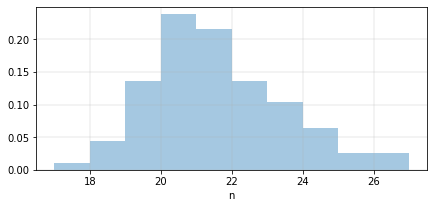

In [46]:
import numpy as np
import matplotlib.pyplot as plt


def abdb_depth(times = 100, n = 2**10):
    '''Calcula la altura de árboles alaorios de n nodos'''
    depth_trees = []
    for i in range(times): 
        T = BSTree()
        l = np.random.permutation(n)

        for i in l:         #insert
            T.insert(i)
            
        T.depth()
        depth_trees.append(T.depth()) 
    return depth_trees

times = 500
n = 2**10
l = abdb_depth(times = times, n=n)


# ----Plot -------
fig, ax = plt.subplots(1, 1,sharex=False, figsize=(7,3)) 
ax.set_xlabel("n")
ax.grid(lw=0.3)
ax.hist (l, density=True,  histtype='stepfilled', alpha=0.4)

#ax[1].hlines (1,0, 1, color='red')



plt.show()

# Árboles de expresión

## Definición:

Un Árbol de Expresión (AdE) es un árbol binario tal que:
* Nunca está vacío
* Los nodos internos contienen operadores
* Las hojas contienen operandos *atómicos*.
* Todo nodo que no sea hoja tiene 2 hijos, i.e., los operadores que consideramos son binarios, *operan sobre dos operandos*.

Notad que un árbol de expresión es *recursivo*: los subárboles de un AdE también son árboles de expresión. Todo subárbol contiene una sub-expresión.

<pre>
               *
           /       \  
          +          -
        /  \       /   \ 
       A    B     C    /
                     /   \
                    D     E
 
</pre> 

* Los operadores de mayor precedencia deben aparecer en la parte inferior del árbol (a menos que en la expresión infijo se consideren paréntesis, ver a continuación).

* Cuando un AdE se recorre en orden previo **(preorden)** se obtiene una expresión aritmética **prefijo:** * + A B – C / D E
* Cuando un AdE se recorre en orden posterior **(postorden)** se obtiene una expresión aritmética **postfijo:** A B + C D E / - *
* Recorrido en **orden medio** (inorden) e **_imprimiendo_ paréntesis** al comienzo y al final de la llamada a cada sub-árbol se obtiene una expresión **infijo**: ((A + B) * (C – (D / E)))

## Algoritmo para construir un AdE

Se utiliza el mismo algoritmo que para evaluar una expresión postija (o traducir una expresión postfija a infija o prefija). Al igual que en estos casos, el algoritmo recibe como parámetro de entrada una expresión postfija y, en este caso, devuelve un árbol de expresión.

* Se crea una pila auxiliar donde se almacenarán árboles de expresión.
* Se procesa la expresión postfija de izquierda a derecha símbolo a símbolo:
    * Si el símbolo leído es un **operando** se **crea** un nuevo AdE, en cuya raíz guardamos el operando leído. El AdE se **inserta** en la pila.
    * Si el símbolo leído es un **operador** se hacen **dos pop** de la pila, se crea un nuevo AdE que se **inserta** en la pila
* Al finalizar la expresión se hace un **pop** de la pila. Si la pila queda vacía la expresión postfija inicial era correcta y se devuelve el AdE. 


<div class="alert-warning">

**_Cuestiones_**

* **(F)** Indique paso a paso la evolución de un algoritmo para construir el AdE correspondiente a la expresión:
    $(A+B)\cdot(C+D+F)$

# Problemas

## Árboles

### Número de nodos

Proporcione un procedimiento recursivo que devuelve el número de nodos de un árbol binario. ¿Cúal es el coste de dicho procedimiento?
```python
def num_nodes(self):
    pass
```
**Solución:**

*Pseudocódigo*

```
num_nodes(T: arbol) -> int:
    if T == empty:
        return 0
    return 1 + num_nodes (T.left) + num_nodes(T.right)
``` 

In [ ]:
def num_nodes(self):
    def _num_nodes_rec (node):
        if node == None:
            return 0
        # General case
        l = _num_nodes_rec(node._left)
        r = _num_nodes_rec(node._right)
        return 1 + l + r
        
    return _num_nodes_rec(self._root)

### Altura de un árbol
Proporcione un procedimiento recursivo que devuelva la altura de un árbol binario
```python
 def depth(self):
        '''Heigh of a tree: The length of the longest path in the tree;'''
        pass
```
**Solución:**

In [9]:
def depth(self):
    def _depth_rec(node):
        # Base case
        if node == None:
            return -1
        
        # General case
        depth_l = _depth_rec(node._left)  # left tree's depth 
        depth_r = _depth_rec(node._right) # right tree's depth 
        return 1 + max(depth_l, depth_r)
    
    return _depth_rec(self._root) 

### Imagen refleja

* Implementa una función que convierta un árbol en su imagen refleja (subárboles izquierdos a la derecha y vicecersa)
```python
def mirror(self):
    '''converts a tree into its mirror image
    (left subtrees to the right and vice versa)
    '''
    pass
```

* Implementa una función que devuelva el árbol reflejo de uno dado. El árbol original **no** se modifica
```python
def mirror_new(self) -> Tree:
    '''Returns a new tree with the self mirror image
    (left subtrees to the right and vice versa)
    '''
    pass
```

**Solución:**

In [12]:
def mirror(self):
    '''converts a tree into its mirror image
    (left subtrees to the right and vice versa)
    '''
    def _mirror(node):
        # Base case
        if node == None:
            return
            
        # General case
        node._left, node._right = node._right, node._left
        _mirror(node._left)
        _mirror(node._right)
              
    _mirror(self._root)
    
def mirror_new(self):
    def _mirror_new(node_source):
        #  Base case ---
        if not node_source:
            return None
            
        # General case
        node_new = self.Node(node_source._data)
        node_new._left = _mirror_new(node_source._right)
        node_new._right = _mirror_new(node_source._left)
        return node_new
        
    T = Tree()
    T._root = _mirror_new(self._root)
    return T

### Búsqueda en un árbol

Proporcione un método recursivo que devuelve el nivel en que se encuentra una clave en un árbol binario o None sino se encontrase en él. ¿Cúal sería el coste del algoritmo?
```python
def find_preorder(self, item)-> int:
    pass
```

**Ayuda:**

*  Usa un argumento adicional en la función recursiva con la profundidad actual del nodo.
* Es importante que en la búsqueda **no** se realicen mas recursiones que las estrictamente necesarias. Es decir, si, por ejemplo, se encontrase el item durante la exploración del subárbol izquierdo de un determinado nodo, se debería salir de las recursiones  y, por tanto, **no** debería explorarse el subárbol derecho de dicho nodo.

In [ ]:
 def find_preorder(self, item)-> int:
        def _find_rec(node, item, depth):
            if node == None:
                return None
            elif node._data == item:
                return depth
            
            # --- Caso General 
            l = _find_rec(node._left, item, depth + 1)
            if l != None:  # the node has been found on the left, end the recursion
                return l   #       don't look at the right sub-tree
            
            return _find_rec(node._right, item, depth + 1)
            
        return _find_rec(self._root, item, depth = 0)

### Recorrido en un árbol con profundidad acotada (bounded depth)

Implementa un algoritmo que devuelva una list todos los nodos de un árbol en preorden hasta una profundidad dada:
```python
def preorder_depth_bounded(self, max_depth):
    pass                        
```
*Sugerencia:* Usa un argumento adicional en la función recursiva con la profundidad actual del nodo

**Solución 1:**

In [ ]:
def preorder_depth_bounded(self, max_depth):
    def _recursion(l, node, max_depth, actual_depth):
        # Base case
        if node == None or actual_depth > max_depth:
            return
        # General case
        actual_depth += 1
        l.append(node._data)
        _recursion(l, node._left, max_depth, actual_depth)
        _recursion(l, node._right, max_depth, actual_depth)
          
    l = list()
    _recursion(l, self._root, max_depth, 0)
    return l

**Solución 2:**
    
Otra posibilidad es que la función interna reciba como único parámetro la max_depth y decrementarlo en cada llamada recursiva. En este caso el caso base, ees decir la condición de salida de la recursión, sería que el valor del parámetro tuviese el valor 0. 

In [ ]:
def preorder_depth_bounded(self, max_depth):
    '''Solution 2'''
    def _recursion(l, node, max_depth):
        # Base case
        if node == None or max_depth < 0:
            return
            # General case
            max_depth -= 1
            l.append(node._data)
            _recursion(l, node._left, max_depth)
            _recursion(l, node._right, max_depth)
          
    l = list()
    _recursion(l, self._root, max_depth)
    return l

### Imprimir caminos

Implementa una función que, dado un elemento del árbol, imprima el camino desde la raíz hasta el nodo donde se encuentra el elemento.
¿Cúal es el coste del algoritmo?

```python
def print_path(self, item):
    pass
```

* Es importante que solo se imprima los nodos que forman el camino desde la raíz hasta el nodo con el item **sin incluir**, por tanto, aquellos otros nodos que el algoritmo haya tenido que visitar hasta encontrar el nodo con el item. 

* Si utilizas memoria auxiliar esta debería ser la mínima posible. Por ejemplo, es lícito que tu algoritmo almacene una referencia a un nodo que forma parte del camino pero **no** a un nodo que no perteneciese a él, incluso aunque sea temporalmente en un buffer. 

**Solución:**

 

Dos formas comunes de resolver el problema son:
* Usar una cola para ir almacenando el camino recorrido al hacer una búsqueda del elemento. Al encontrar el elemento, se imprime la colección de nodos en el orden apropiado.
* Extender la estructura del nodo con un campo adicional parent. Al encontrar el elemento, se genera el camino a partir de este campo hasta llegar a la raíz, por ejemplo, recursivamnte (o mediante una pila). 


### Aplicar una función a todos los nodos de un árbol

Proporcione un método público `apply_function` de la clase Tree que aplique una función a cada nodo del árbol. La función se debe recibir como parámetro del método. 
El método `apply_function` debe poder soportar funciones con diferentes números de argumentos y debe devolver el retorno de la ejecución de la función sobre cada uno de los nodos del árbol.

**Ayuda:** Utilice los argumentos `*args` y `**kwargs`

### Verificar si un árbol es estrictamente binario

Un árbol es estrictamente binario si todos sus nodos que **no** son hojas tiene **dos hijos**. Proporcione un algoritmo para determinar si un árbol es estrictamente binario

```python
def is_strictly_binary(self) -> bool:
    pass
```

### Verificar si un árbol binario es un ABdB

Escribe el pseudocódigo de un algoritmo que compruebe si un arbol binario $T$ es un árbol binario de búsqueda.

**Nota:** No es suficiente comprobar que la relación de orden se cumple entre el padre y sus hijos. ¿Por qué?

```python
def is_binary_search_tree(self) -> bool:
```

**Sugerencia:**

* La idea básica es mantener, para cada nodo del árbol, una cota inferior y una cota superior de los valores que pueden ocurrir en ese parte del árbol.
 
 En las llamadas recursivas desde un nodo cualquiera, a su **subárbol izquierdo** se le pasará como cota inferior la cota inferior recibida por el nodo que invoca a la función recursiva, y como cota superior el valor del propio nodo. Es decir, el atributo .data de todo nodo en el subárbol izquierdo del nodo debe ser inferior a node._data, y además superior a la cota inferior que ha recibido. De forma similar, su **subárbol derecho** tendrá como cota inferior el valor del nodo y como cota superior aquella que le hayamos pasado.


**Solución:**
 

## Árboles binarios de búsqueda

### Búsqueda iterativa en ABdB

Proporcione la versión iterativa del método `find()`del árbol binario de búsqueda 
```python
def find_iter(self, item):
    pass
```
**Solución:**

In [2]:
def find_iter(self, item):
        node = self._root
        while node != None and node._data != item:
            if item < node._data:
                node = node._left
            else:
                node = node._right
        if not node:
            return None
        else:
            return node._data

### Mínimo de un ABdB

Construya una funcion recursiva y ora iterativa que deveuelva el mínmo de un árbol binario de búsqueda. Ambas funciones acceden a la Estructura de Datos

```python
def minimum(self):
    pass
```
<img src="bst_min_max.jpg">

**Solución:**

Tanto la solución como la iterativa son muy sencillas: hay que *descender siempre* por el subárbol izquierdo hasta llegar a la hoja. 

In [13]:
def _minimum_rec(self, node):
    
    # Base case
    if node._left == None:
        return node
    # General case
    return self._minimum_rec(node._left)
    
def minimum(self):
    '''Solución recursiva'''
    if not self.is_empty():
        return self._minimum_rec(self._root)._data
    return None      # empty tree

### Sucesor de un nodo

Suponga un ABdB. *Independientemente* de si las claves son distintas o no, el sucesor de un nodo se define como el siguiente nodo visitado cuando el árbol se recorre con el algoritmo *in-order*.

Dado un árbol de búsqueda binaria, proporcione el método privado _sucessor(self, x)
que devuelve el nodo sucesor a uno dado.

```python
def _successor(self, x:Node):
    pass
```
De forma que el siguiente método público devuelva el dato almacenado en el nodo sucesor
```python
def successor(self, item):
    x = self._find_rec(self._root, item)  # returns the node with item as data attribute
    if x != None:
        y = self._successor(x)
    if y != None:
        return y._data
    return None
```

**Ayuda:**

La estructura de un árbol de búsqueda binario permite determinar el sucesor de un nodo sin comparar claves. El procedimiento _successor() devolverá el sucesor de un nodo $x$ en un ABdB  si existiese, o `None` si $x$ fuese el último nodo que se visitaría durante un recorrido *in-order* del árbol. 
 
El código de `_sucessor()` debe considerar dos casos:
* Si el subárbol derecho del nodo $x$ no está vacío, entonces el sucesor de $x$ es el nodo más a la izquierda en el subárbol derecho de $x$ (es decir, *el mínimo del árbol cuya ráiz es node.right*). Por ejemplo, el sucesor del nodo con la clave $15$ en la Figura $(c)$ es el nodo con la clave $17$. 
* Sin embargo, si el subárbol derecho del nodo $x$ estuviese vacío y $x$ tuviese un sucesor $y$, entonces $y$ es el ancestro (antecesor) más próximo a $x$ cuyo hijo izquierdo también es antecesor de $x$. Por ejemplo, en la figura $(d)$ el sucesor del 13 es el 15. El 15 es el nodo antecesor mas próximo a 13 que tiene un hijo izquierdo, en este caso el 6, que también es antecesor del 13. Fijate como esta regla también es correcta para obtener, por ejemplo, el sucesor de 2, que es 3.


<img src="bst_successor.jpg">

**Importante:** Una posibilidad **incorrecta** para hallar el sucesor de un nodo dado sería recorrer el ABdB con el algoritmo de preorder, obtener una lista con los nodos del árbol e identificar en la lista el sucesor de $x$. Sin embargo este planteamiento **no es eficiente** y por tanto, es **erroneo**. El coste de esta estrategia sería lineal, $\Theta(n)$, cuando cualquier procedimiento de búsqueda en un ABdB debería tener un coste proporcional a la profundidad del árbol, es decir $O(\log n)$ en el mejor de los casos. 


**Solución:**

In [ ]:
def _successor(self, x):
    if x._right != None:              # leftmost node in right subtree 
        return  self._minimum_rec(x._right) 
    else:      # find the lowest ancestor of x whose left child is an ancestor of x
        p = x._parent
        while p != None and p._left != x:
                x, p = p, x._parent    
    return p

### Predecesor

Dado un árbol de búsqueda binaria, proporcione un método privado *eficiente* que devuelve el nodo predecesor a uno dado en un recorrido *in-order* del árbol

```python
def predecesor_(self, x):
    pass
```

### Imprimir caminos

Implementa una función que, dado un elemento del árbol, imprima el camino desde la raíz hasta el nodo donde se encuentra el elemento. No se considerarán válidos algoritmos no eficientes.
¿Cúal es el coste del algoritmo?

```python
def print_path(self, item):
    ''' Print path for ABdB. 
    Override the method inherited from the TreeProblems class.
    '''
    pass
```
**Consejo:** Compara el coste de está función con la implementada para árboles binarios que **no** sean de búsqueda.

### Borrado de un nodo
(**Referencia:** Cormen et al. 4$^{th}$ Edition)


Proporcione un método que elimine un nodo dado de un ABdB

```python
    def delete(self, item):
        pass
```

Suponga para ello que dispone de una función que trasplanta el subárbol cuyo nodo raíz es *node_new* en el subárbol cuya raíz es *node_old*

```python
    def _transplant(node_new, node_old):
        
```

   La función trasplantar realiza dos acciones: (1) asigna como hijo del padre de *node_old* el nodo *node_new* (esto es, si *node_old* fuese un hijo izquierdo en trasplantar se realiza la asignación `node_old._parent._left = node._new` pero si node_old fuese un hijo derecho se asignaría 
 `node_old._parent._right = node._new`) y (2) asigna como padre de node_new el padre de node_old, esto es `node.new._parent = node_old._parent`


**Estrategia para el borrado:**

Suponga que $z$ es el nodo cuyo campo *data* es *item*:

* Si $z$ no tiene hijos, entonces simplemente elimina el nodo $z$ modificando su padre para sustituir $z$ por None como hijo.

* Si $z$ tiene un único subárbol, entonces *transplanta* en $z$ el subárbol cuya raíz es el hijo de $z$, esto es, *el subárbol hijo toma la posición de z en el árbol*. Este caso se representa en los paneles (a) y (b) del dibujo.

*  Si $z$ tuviese dos hijos, encuentra el sucesor de $z$, *y*. En este caso, **necesariamente** el sucesor $y$ será el mínimo del subárbol derecho de $z$. Entonces puede ocurrir que o bien $y$ sea el hijo derecho de $z$ o bien que no lo sea.
 * Si $y$ **no** es el hijo derecho de $z$ entonces: 
     1. *Transplanta* en $y$ el árbol cuya raíz es el hijo derecho $y.\_$_right_. El nodo $y$ **no** puede tener un hijo izquierdo (recuerda que $y$ es un mínimo)
     2. Asigna como hijo derecho de $y$ el hijo derecho de $z$ ($r$ en el panel (d) del dibujo) 
     3. Asigna como padre del hijo derecho de $z$ el nodo $y$.   
     4. *Transplanta* en $z$ el árbol cuya raíz es $y$.
     5. Asigna como hijo izquierdo de $y$ el subárbol izquierdo de $z$ (es decir, $l$ en el panel (d) del dibujo).
     6. Asigna como padre del hijo izquierdo de $z$ ($l$ en el panel (d) del dibujo) el nodo $y$ 
 * Si $y$ **no** es el hijo derecho de $z$ entonces realiza los pasos 4, 5 y 6 anteriores. Este caso se representa en el panel (c) del dibujo.
 
 ![](delete.png)
 
 
 **Mejoras a la estrategia par el borrado**
 
 Fíjate que el primer caso ($z$ no tiene ningún hijo) puede considerarse incluido en el segundo ($z$ tiene un único hijo cuyo vlor es None) **sí** en la función *transplant* has considerado la posibilidad de transplantar un nodo None.

<div class="alert-warning">
    
**Cuestiones:**
    
* **F$^+$** En el borrado tal y como lo hemos visto se ha substituido, esencialmente, el nodo borrado por su su sucesor. Otra alternativa sería utilizar el **predecesor** en vez del sucesor. 
 *  ¿Cúal sería el estado del siguiente ABdB si se borrase el 75 y se utilizase el predecesor como estrategia de borrado?
 <pre>
           150
        /      \
       50      200 
      /  \
    25    75
         /   \
       60     80 
      /   \    
     55   65 
         /
        62
         \
         64
</pre>
 * Detalla la estrategia de borrado (o proporciona un pseudocódigo) para si se considerase el predecesor en vez del sucesor



## Búsqueda binaria (arrays)

# Apéndice

In [16]:
class TreeProblems(Tree):
    '''Funciones de los problemas'''    
    
    def num_nodes(self):
        '''Number of nodes by exploring the graph'''
        def _num_nodes_rec (node):
            if node == None:
                return 0
            # General case
            l = _num_nodes_rec(node._left)
            r = _num_nodes_rec(node._right)
            return 1 + l + r
        
        return _num_nodes_rec(self._root)
    
    def depth(self):
        '''Heigh of a tree: The length of the longest path in the tree;'''
        def _depth_rec(node):
            # Base case
            if node == None :
                return -1
            
            # General case
            depth_l = _depth_rec(node._left)  # left tree's depth 
            depth_r = _depth_rec(node._right) # right tree's depth 
                
            return 1 + max(depth_l, depth_r)
        
        return _depth_rec(self._root)
    
    def mirror(self):
        '''converts a tree into its mirror image
        (left subtrees to the right and vice versa)
        '''
        
        def _mirror(node):
            # Base case
            if node == None:
                return
            
            # General case
            node._left, node._right = node._right, node._left
            _mirror(node._left)
            _mirror(node._right)
            
        _mirror(self._root)
    
    def mirror_new(self):
        def _mirror_new(node_source):
            # ---- Base case ---
            if not node_source:
                return None
            
            # ---- General case
            node_new = self.Node(node_source._data)
            node_new._left = _mirror_new(node_source._right)
            node_new._right = _mirror_new(node_source._left)
            return node_new
        
        T = TreeProblems()
        T._root = _mirror_new(self._root)
        return T
            
    def preorder_depth_bounded(self, max_depth):
        '''Solution 1'''
        def _recursion(l, node, max_depth, actual_depth):
            # Base case
            if node == None or actual_depth > max_depth:
                return
            # General case
            actual_depth += 1
            l.append(node._data)
            _recursion(l, node._left, max_depth, actual_depth)
            _recursion(l, node._right, max_depth, actual_depth)
          
        l = list()
        _recursion(l, self._root, max_depth, 0)
        return l
    
    def preorder_depth_bounded(self, max_depth):
        '''Solution 2'''
        def _recursion(l, node, max_depth):
            # Base case
            if node == None or max_depth < 0:
                return
            # General case
            max_depth -= 1
            l.append(node._data)
            _recursion(l, node._left, max_depth)
            _recursion(l, node._right, max_depth)
          
        l = list()
        _recursion(l, self._root, max_depth)
        return l
    
    def find_preorder(self, item)-> int:
        def _find_rec(node, item, depth):
            if node == None:
                return None
            elif node._data == item:
                return depth
            
            #---- General case
            l = _find_rec(node._left, item, depth + 1)
            if l != None:   # return if node is found on the left, end the recursion
                return l    #       don't look in the right sub-tree
            
            return _find_rec(node._right, item, depth + 1)
            
        return _find_rec(self._root, item, depth = 0)
    
    def print_path(self, item):
        def _print_path(node, item, l):
            if node == None:
                return 
            elif node._data == item:
                l.append(node)
                return 
            
            _print_path(node._left, item, l)
            if len(l) != 0:
                l.append(node)
                return
            _print_path(node._right, item, l)
            if len(l) != 0:
                l.append(node)
           
        from collections import deque
        l = deque()                       # Stack with nodes path
        _print_path(self._root, item, l)
        while len(l) != 0:                # poping from the stack
            print(l.pop()._data)
    
    def apply_function(self, fun, *args, **kwargs):
        def _apply_function(node, l, fun, *args, **kwargs):
            if node == None:
                return
            r = fun(node._data, *args, **kwargs)
            l.append(r)
            _apply_function(node._left, l, fun, *args, **kwargs)
            _apply_function(node._right, l, fun, *args, **kwargs)
        
        l = list()
        _apply_function(self._root, l, fun, *args, **kwargs)
        return l
    
    def is_strictly_binary(self):
        def _is_strictly_binary(node):
            if node._left == None and node._right == None:  # es hoja
                return True
            elif node._left == None or node._right == None: # solo un hijo
                return False
            
            # General case
            left = _is_strictly_binary(node._left)
            right = _is_strictly_binary(node._right)
            return left and right
        return _is_strictly_binary(self._root)
    

    def is_binary_search_tree(self):
        '''Return True if self is ABdB'''
        def _is_bst(node, min_, max_):
            #---- Base case -----
            if node == None:
                return True
            
            # --- General case
            bool_ = True
            if min_:                                  # Si tiene cota inferior su 
                bool_ = node._data >= min_            #   valor debe ser superior
            if max_ :                                 # Si tiene cota superior su
                bool_ = bool_ and node._data <= max_  #   valor debe ser inferior
            if not bool_:
                return False
            
            left_ = _is_bst(node._left, min_, node._data)
            right_ = _is_bst(node._right, node._data, max_)
            return left_ and right_
            
        return _is_bst(self._root, None, None)
                
    
class BSTreeProblems(BSTree, TreeProblems):
    """ ABdB problems
    """
    
    def find_iter(self, item):
        node = self._root
        while node != None and node._data != item:
            if item < node._data:
                node = node._left
            else:
                node = node._right
        if not node:
            return None
        else:
            return node._data
        
    def _transplant(self, u, v):
        if u._parent == None:       # u is root
            self._root = v
        elif u._parent._left == u:  # if u is left child
            u._parent._left = v     #   the transplanted must be left
        else:                       # if u is right child
            u._parent._right = v    #   the transplantes must be right 
            
        if v != None: 
            v._parent = u._parent   # set v parent u parent
        u = None                    # garbage collection
        
    def _minimum_rec(self, node):
        # Base case
        if node._left == None:
            return node
        # General case
        return self._minimum_rec(node._left)
    
    def minimum(self):
        if self._root != None:
            return self._minimum_rec(self._root)._data
        return None      # empty tree
    
    def delete(self, item):
        '''Cormen et al 4. Edition p. 325'''
        z = self._find_rec(self._root, item)  # find the item's node
        if z is None:
            raise TypeError(f'item {item} does not found')
        
        if z._left == None:
            self._transplant(z, z._right)     # replace z by its right child 
        elif z._right == None:
            self._transplant(z, z._left)      # replace z by its left child
        else:
            y = self._minimum_rec(z._right)   # y is z's sucessor
            if y != z._right:                 # is y farther down the tree?
                self._transplant(y, y._right) # replace y by its right child
                y._right = z._right           # z's right child    
                y._right._parent = y          # becomes y's right child 
            self._transplant(z, y)            # repalce z by its sucessor y 
            y._left = z._left                 # and gives z's left child to y 
            y._left._parent = y               #          which had no left child
                
    def _successor(self, x):
        if x._right != None:              # leftmost node in right subtree 
            return  self._minimum_rec(x._right) 
        else:      # find the lowest ancestor of x whose left child is an ancestor of x
            y = x._parent
            while y != None and y._left != x:
                x, y = y, x._parent    
        return y    # return the parent
    
    def successor(self, item):
        x = self._find_rec(self._root, item)  # returns the node with item as data
        if x != None:
            y = self._successor(x)
        if y != None:
            return y._data;
        return None
    
    def print_path(self, item):
        '''Print path for ABdB. 
        Override the method inherited from the TreeProblems class.
        '''
        
        def _print_path(node, item, l):
            #---- Base case
            if node == None:
                return None
            # ----General case--
            if node._data == item:
                l.append(node)
                return
            elif item < node._data:
                _print_path(node._left, item, l)    
            else:
                _print_path(node._right, item, l)
    
            if len(l) != 0:         # if item has been found, therefor l is not empty,
                l.append(node)      #      add the node to the stack 
        
        from collections import deque
        l = deque()                 # stack
        _print_path(self._root, item, l)
        while len(l) > 0:
            print(l.pop()._data)
              
    
#------ Driver programm

t = BSTreeProblems()
# Adding nodes
values = ['i', 'g', 'c', 'f', 'h', 'b', 'e', 'j', 'l', 'o', 'k']
#values = ['m', 'a', 'c', 'z']
for i in values:
    t.insert(i)
    
print('\nTree structure:\n')
print(t)
print('Tree depth:', t.depth())
print('Num nodes:', t.num_nodes())

print('Print inorder:', t.inorder())

maxdepth = 1
l = t.preorder_depth_bounded(maxdepth)
print(f'Print preorder until maxdepth: {maxdepth}, {l}')

node = 'c'
print(c, 'nivel:', t.find_preorder(nde))
print(c, 'successor:', t.successor(node))

print(f'Path to: {node}')
t.print_path(c)

print(f'Delete: {node}')
t.delete(node)
print(t)

def concatena(char_, sufijo_):
    return char_ +  sufijo_

print(f'Aplica función {concatena.__name__} a cada nodo del arbol:')
print(t.apply_function(concatena, '_hola'))

print('Es el el árbol t un árbol binario de búsqueda:', t.is_binary_search_tree())
print('Es el el árbol t estrictamente binario:', t.is_strictly_binary())

print('Árbol reflejo de T:')
t_reflejo = t.mirror_new()
print(t_reflejo)
print('Es el el árbol t_reflejo un árbol binario de búsqueda:', t_reflejo.is_binary_search_tree())


Tree structure:

| z
m
| | c
| a

Tree depth: 2
Num nodes: 4
Print inorder: ['a', 'c', 'm', 'z']
Print preorder until maxdepth: 1, ['m', 'a', 'z']
c nivel: 2
c successor: m
Path to: c
m
a
c
Delete: c
| z
m
| a

Aplica función concatena a cada nodo del arbol:
['m_hola', 'a_hola', 'z_hola']
Es el el árbol t un árbol binario de búsqueda: True
Es el el árbol t estrictamente binario: True
Árbol reflejo de T:
| a
m
| z

Es el el árbol t_reflejo un árbol binario de búsqueda: False


In [ ]:
def bbinaria(a, from_, to_, item):
    # base case
    if to_ < from_:
        return None
    
    # General case
    m = (from_ + to_)//2
    if item == a[m]:
        return m
    elif item < a[m]:
        return bbinaria(a, from_, m-1, item)
    else:
        return bbinaria(a, m+1, to_, item)
    
# Drive 
if True:
    a = [i for i in range(5, 100, 5)]
    print(a)
    print(bbinaria(a, 0, len(a), 100))

Referencia: https://book.pythontips.com/en/latest/generators.html


* **Iterable**: 
    * Un objeto del tipo *iterable*, y que, por tanto, tiene la propiedad de ser iterable) es cualquier objeto que implemente el método `__iter__()` o el método `__getitem__()`
    * Un objeto que sea iterable puede ser iterado en un bucle `for`
    * Un objeto que *solo* es iterable NO implementa el método `__next__()`.
    
    
   * Ejemplo: Una lista es un objeto iterable.
   * Un objeto iterable **no es** un iterador. Sin embargo, el método` __iter__()` de un objeto iterable devuelve un **iterador**.
   
   
* **Iterador**: 
    * Cualquier objeto que implemente el método __next__() es un iterador.
    * Si un objeto es un iterador "produce (escupe) un dato" cuando se invoca al método `__next()__`. Además tras cada llamada al método `__next()__` el iterador modifica su estado. 
    * Un iterador también puede ser invocado en una sentencia for.
    

* **Generador**: 
    * Es un método para construir un iterador de una forma sencilla. Es "sencilla" porqué no tenemos necesidad de crear explicitamente una clase de objeto que incluya el método `__next__()'. Un generador lo *definimos* con la misma sintaxis que una función en la que en vez de *return* utilizamos *yield*   
    * Un generador se puede invocar directamente en una sentencia *for*.
    * **Importante!** La primera vez que se invoca a un generador **no** se ejecuta (esto es, *no escupe* un dato) sino que crea el iterador.


* Función  `iter(object)`: Si object es un objeto iterable, cuando invocamos a iter(object) obtenemos un iterador de object. La función *iter()* invoca a *object.__iter__()*.

* Otra forma de obtener un iterador de un objeto iterable (o de otro iterador) es mediante *iterator comprenhesion*
```python
g = (ele**2 for ele in range(100))
type(g)
next(g)
next(g)
```

* Importante:
    Recuerda un generador **no es** una función que en vez de *return* tiene *yield*. 
    (1) Una diferencia entre una función y un generador es que cuando invocamos a un generador creamos el iterador pero **no lo ejecutamos (es decir no empieza a *escupir datos*)**. (2) A diferencia de una función un generador modifica su estado tras su invocación con *next()*

In [8]:
g = (ele**2 for ele in range(100))
type(g)
next(g)
next(g)

1

In [26]:
def fun_generator(tope:int):
    '''Defino un generador: Productor de datos'''
    for dato in range(tope):
        yield dato

gen = fun_generator(10)    # Cuando invoco al generador creo un iterador
print(type(gen))
print(next(gen))           # Una vez creado el iteardor puedo empezar a escupir datos

for i in fun_generator(5): # un generador se puede invocar en una sentencia for
    print(i)

l = iter([2, 2, 4])        # La función iter permite crear un iterador a partir      
print(type(l))             # un objeto iterable.
print(next(l), next(l), next(l))    


g = (i**2 for i in [2, 3, 4])   # generator comprenhension
print(type(g))
print(next(g), next(g))


<class 'generator'>
0
0
1
2
3
4
<class 'list_iterator'>
2 2 4
<class 'generator'>
4 9


In [37]:
def fun(cadena):
    return cadena.upper()

def f_gen(cadena):
    yield cadena.upper()
    


def generator2(iterable):
    for c in iterable:
        yield c.upper() 
        
def generator1(str_):
    for c in  str_.split():
        yield c

def wrapper(str_):
    for c in generator1(str_):
        yield fun(c)
    

#-------------

g_compuesto1 = (fun(c) for c in generator1('hola don pepito') )

print(next(g_compuesto1), next(g_compuesto1))


g_w = wrapper('hola don daniel')
print(next(g_w), next(g_w))

# Mejor puedo jugar para que el chorro de datos este generado por un generador o por otro



HOLA DON
HOLA DON


Pero un generador no es mas que un generador de datos. Me llega un dato de un generador, hago algo con él (habitualmente invocando a una función a la que le paso el dato como parámetro) y lo escupo. No almaceno nada en memoria. Tengo (al menos) dos formas de hacerlo:
1. Creo un generador nuevo. Su cuerpo principal es un bucle for que para cada dato que le llega al generador y lo escupe con un yield
2. Generator comprenhesion

In [51]:
def factorial_rec(n):
    if n == 1:
        return 1
    return n * factorial_rec(n-1)

print(factorial_rec(5))

# costoso
for i in range(1, 5):
    print(factorial_rec(i))

# Menos costoso: Si queiero calcular el factorial de los números n, (n-1), (n-2)
# calculo el de n y guardo los resultados parciales 

def factorial_rec_print(n):
    if n == 1:
        print(1)
        return 1
    fact = n * factorial_rec_print(n-1)
    print(fact)
    return fact

factorial_rec_print(5)
    
def factorial_g(n):
    if n == 1:
        yield from 1
    f = n * factorial_g(n-1)
    yield from f

g = factorial_g(5)
next(g)

120
1
2
6
24
1
2
6
24
120


TypeError: unsupported operand type(s) for *: 'int' and 'generator'